In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sk
import pickle
import mne

import torch
import torch_directml
from torch import nn

In [3]:
with open('/home/pigmaster96/DEAPdata/Deap_Data.pkl','rb') as file:
    data1=pickle.load(file)

In [9]:
data1.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

0-39 first sub, 32 subs

In [5]:
#0-39th entries denote first subject
for i in range(0,39):
    if i==0:
        final=data1[i]['data']
    else:
        final=np.dstack((final,data1[i]['data']))
final=np.permute_dims(final,axes=[2,0,1])
erp=np.mean(final,axis=0)

In [6]:
#electrode postitions
electrodenames=['Fp1','AF3','F3','F7','FC5','FC1','C3','T7','CP5','CP1','P3','P7'
	,'PO3'
	,'O1'
	,'Oz'
	,'Pz'
	,'Fp2'
	,'AF4'
	,'Fz'
	,'F4'
	,'F8'
	,'FC6'
	,'FC2'
	,'Cz'
	,'C4','T8','CP6','CP2','P4','P8','PO4','O2']
np.array(electrodenames).shape

(32,)

In [7]:
info=mne.create_info(40,128,'eeg')
eeg=mne.io.RawArray(erp,info)
    

Creating RawArray with float64 data, n_channels=40, n_times=8064
    Range : 0 ... 8063 =      0.000 ...    62.992 secs
Ready.


NOTE: plot_raw_psd() is a legacy function. New code should use Raw.compute_psd().plot().
Effective window size : 16.000 (s)
Plotting power spectral density (dB=False).


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/home/pigmaster96/miniconda3/envs/pytdml/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


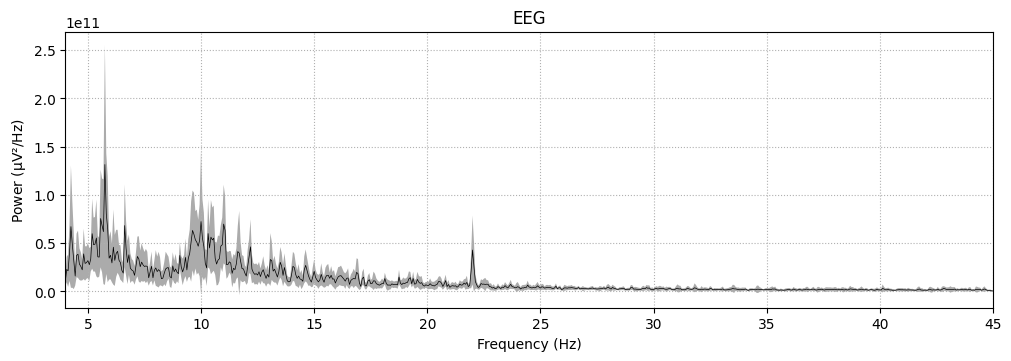

In [8]:
chans=np.arange(0,31,1)
fig=mne.viz.plot_raw_psd(eeg,fmin=4,fmax=45,picks=chans,dB=False,average=True)